# Deep Learning: Assignment 1. Cat, Dog, Car or Bike?

**Dataset:** You are provided with a dataset which contains more than 3000 pictures with either a cat, a dog, a motorbike or a car. The dataset has already been split in training, test and validation sets. Your task is to build and train a CNN which is able to recognize which object is depicted in the picture. To this end, you must use and change the code we presented during our tutorial. You should copy and unzip the dataset in your local directory (do not change the name of the directory), namely the same directory where this jupyter notebook is going to be stored. 

**Python and Keras version.** We recommend you to use Python 3.6 (there might be some incompatibility issues between keras and the most recent versions of Python). We also recommend to use TensorFlow 2.1.0 and Keras 2.3.1, which are the settings we used to test everything. You can find the documentation for keras at the following address https://keras.io/layers/convolutional/.

**What to submit:** You should post on moodle this jupyter notebook filled will all the answers to the questions, the Python code and the plots. Do not change any part of the code that is provided to you, unless explicitly asked. The answers to the questions should be provided below at the end of the notebook. You should also post on moodle the model for question 5 (name of the model "modelQ5.h1"). In case your model has size larger than 100MB please provide a link to Google Drive or other storage services. **Important**: For each question you will get 0 points if the code or any of the plots are missing or the code is not correct.

**Image Size** You should use image size **32x32** for the first three questions. You can use higher resolutions for questions 4 and 5. We kindly ask you to use your machine whenever possible, in order to avoid the GPU farm to be overwhelmed. 

**GPU Farm**: You will have access to the HKU GPU farm to do this assignment. Additional info on how to use it is contained in a separate document provided with the assignement. Please use this only for questions 4 and 5. We will show how to use GPU Farm below. 

If you have any questions, you can join the WhatsApp group to discuss together. Also Assignment1 tutorial video link will be available in this group. https://chat.whatsapp.com/GPVWwxFa1NX1ci3ktCnMww


## How to Use GPU Farm.

For **windows** users to use ssh to the GPU Farm, you should download **MobaXterm** first. For mac and linux users, you can use the terminal directly.

1.Connect to HKU Network via HKU VPN with your HKU Portal account
https://its.hku.hk/services/network-connectivity/hkuvpn/

 

2.The instructions for Accessing GPU Farm are on this page:
https://www.cs.hku.hk/gpu-farm/quickstart

For GPU Farm Phase 1, click the following link and login with your CS computing account.
https://intranet.cs.hku.hk/gpufarm_acct/


But actually, GPU Farm 1 is not stable. Alternatively, we strongly recommend you use GPU Farm Phase 2, you may try with your HKU Portal account.
https://intranet.cs.hku.hk/gpufarm_acct_cas/ for application.

## Install.md
You should download and install **anaconda** first. To create the environment in Anaconda prompt, enter the following command (without the $ symbol). 

In [ ]:
$ conda create -n py3.6_tf2.1_ke2.3.1 python=3.6
$ conda activate py3.6_tf2.1_ke2.3.1
 
$ pip install tensorflow==2.1.0
$ pip install keras==2.3.1
$ pip install matplotlib
$ pip install jupyter

## Prepare the dataset
We have prepared the dataset for you. You should download it in:
https://drive.google.com/file/d/1wTuQyTtHCQq-xawNkIUEWT-ga1FrVOrj/view?usp=sharing

Unzip the file and the folder structure is shown as:
```
Assign1
├── Skeleton_Assignment1.ipynb
├── cat_dog_car_bike
│   ├── train
│   ├── val
│   ├── test
```

##### Question 1 (CNN Architecture) 

Define a CNN architecture with the following layers stacked on top of each other in the following order:
1. A convolutional layer with 32 5 × 5 filters. 
2. A max Pooling Layer with size 2 × 2.
3. A convolutional layer with 64 5 × 5 filters. 
4. A max Pooling Layer with size 2 × 2.
5. A convolutional layer with 64 3 × 3 filters. 
6. A max Pooling Layer with size 2 × 2.
7. A convolutional layer with 64 3 × 3 filters. 
7. A max Pooling Layer with size 2 × 2.
9. A dense layer with 256 units.
10. A dense layer with k units and softmax (aka cross entropy) loss function.

Use the sigmoid activation function for all layers but the last one which uses the softmax. Use default values for the parameters which are not specified above.

a) <font color=Red>[5pts]</font> Determine the right value for k and write the value for k you use at the end of the notebook. Write the code to solve a) in the cell below


In [6]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='sigmoid',
                        input_shape=(32, 32, 3))) # 32 x 32 rgb image

# write your own code for a) here
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(4, activation='softmax')) # alternatively we could use the softmax activation function, in which case you should change the learning rate
# k = 4 because there are four classes in total

model.summary()

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_24/convolution' (op: 'Conv2D') with input shapes: [?,1,1,64], [3,3,64,64].

b) <font color=Red>[5pts]</font> The architecture defined above cannot be built because of an error. You should fix such an error **without changing the number of convolutional, pooling or dense layers, the number of filters, the size of the filters, or the number of units**. Write at the end of the notebook which strategy did you use and write the code to solve b) in the cell below:

In [7]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='sigmoid',
                        input_shape=(32, 32, 3)))


# write your own code for b) here
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='sigmoid',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(4, activation='softmax')) # alternatively we could use the softmax activation function, in which case you should change the learning rate
# k = 4 because there are four classes in total

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 3, 3, 64)         

## Question 2 (Training a small CNN from scratch)

We are now considering a different CNN architecture specified in the code below. **Fill the missing parts (there is a comment (#) specifying which parts must be filled)**. After that, you should train such a CNN using the following values for the parameters:

- loss function = crossentropy;
- optimizer RMSprop with learning rate = 0.1;
- metrics = accuracy;
- Batch size for the training/validation generators = 20; 
- epochs = 30.

*Write your codes below and some answers at the end of the notebook again. Plot both the training/validation accuracy and training/validation as a function of the epochs. Report the plots below:*

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/30
84/84 [==============================] - 12s 148ms/step - loss: 24.2469 - acc: 0.2645 - val_loss: 26.2912 - val_acc: 0.2898
Epoch 2/30
84/84 [==============================] - 6s 75ms/step - loss: 20.7231 - acc: 0.2788 - val_loss: 34.1975 - val_acc: 0.2647
Epoch 3/30
84/84 [==============================] - 6s 74ms/step - loss: 21.8008 - acc: 0.2567 - val_loss: 13.8218 - val_acc: 0.2359
Epoch 4/30
84/84 [==============================] - 7s 77ms/step - loss: 21.0877 - acc: 0.2645 - val_loss: 36.6485 - val_acc: 0.2096
Epoch 5/30
84/84 [==============================] - 6s 73ms/step - loss: 21.6190 - acc: 0.2555 - val_loss: 21.4577 - val_acc: 0.2096
Epoch 6/30
84/84 [==============================] - 6s 73ms/step - loss: 21.6887 - acc: 0.2454 - val_loss: 17.8440 - val_acc: 0.2359
Epoch 7/30
84/84 [==============================] - 6s 68ms/step - loss: 21.0512 - acc: 0.2663 - val_loss: 37.2320 - 

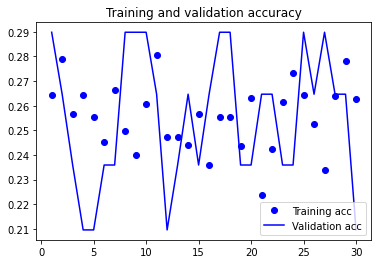

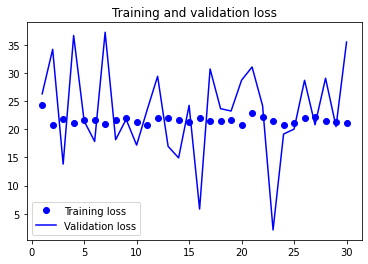

In [5]:
import os
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='sigmoid',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='sigmoid',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
# something is missing here 
model.add(layers.Flatten()) # convert to 1D
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(4, activation='softmax')) # replace k with the corresponding value

model.compile( # fill this part ...
              loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.1),
              metrics=['acc']
              )
    
   
from keras.preprocessing.image import ImageDataGenerator
base_dir = './cat_dog_car_bike'
train_dir= os.path.join(base_dir, 'train')
validation_dir= os.path.join(base_dir, 'val')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=84,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=42)

    
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

a) <font color=Red>[5pts]</font> What is the main problem for your model?

1. Overfitting
2. Underfitting

Write your answer below at the end of the notebook. 


b) <font color=Red>[5pts]</font> **Without changing the learning rate**, change one hyperparameter so as to improve the training error. Which hyperparameters did you change? 

*Write your codes below and some answers at the end of the notebook again. Plot both the training/validation accuracy and training/validation as a function of the epochs. Report the plots below:*


Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/30
84/84 [==============================] - 9s 105ms/step - loss: 1.2401 - acc: 0.4549 - val_loss: 0.6580 - val_acc: 0.6479
Epoch 2/30
84/84 [==============================] - 8s 100ms/step - loss: 0.8254 - acc: 0.6573 - val_loss: 0.4996 - val_acc: 0.6862
Epoch 3/30
84/84 [==============================] - 8s 91ms/step - loss: 0.6537 - acc: 0.7099 - val_loss: 0.4971 - val_acc: 0.6898
Epoch 4/30
84/84 [==============================] - 8s 91ms/step - loss: 0.5988 - acc: 0.7343 - val_loss: 0.3225 - val_acc: 0.6743
Epoch 5/30
84/84 [==============================] - 8s 92ms/step - loss: 0.5486 - acc: 0.7403 - val_loss: 0.4575 - val_acc: 0.7545
Epoch 6/30
84/84 [==============================] - 8s 93ms/step - loss: 0.5261 - acc: 0.7630 - val_loss: 0.8602 - val_acc: 0.7126
Epoch 7/30
84/84 [==============================] - 8s 97ms/step - loss: 0.5104 - acc: 0.7690 - val_loss: 0.4807 - val_acc: 0.759

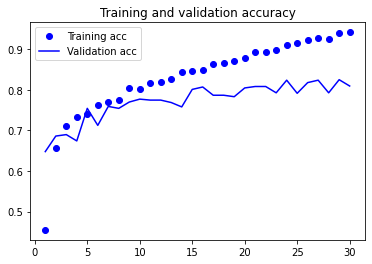

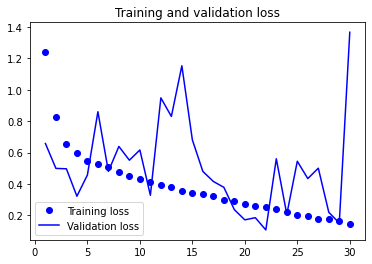

In [12]:
import os
from keras import layers
from keras import models
from keras import optimizers

# fill this part
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
# something is missing here 
model.add(layers.Flatten()) # convert to 1D
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax')) # replace k with the corresponding value

model.compile( # fill this part ...
              loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.00015),
              metrics=['acc']
              )
    
   
from keras.preprocessing.image import ImageDataGenerator

base_dir = './cat_dog_car_bike'
train_dir= os.path.join(base_dir, 'train')
validation_dir= os.path.join(base_dir, 'val')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=84,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=42)

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## Question 3 (Optimize the learning rate) 

a)<font color=Red>[10pts]</font> Determine an interval [a,b] of possible values for the learning rate, which is “wide enough”. In particular, you should try to guarantee that **your interval contains an optimal value for the learning rate**. At the same time the interval that you provided should not be too wide, due to efficiency reasons. In particular, your interval [a,b] should be such that $\frac{b}{a} \leq 10$.

b)<font color=Red>[15pts]</font> Provide a "good" value for the learning rate. In particular, the training error should become smaller than 0.3 within 30 epochs. 

*Write your codes below and some answers at the end of the notebook again. Plot both the training/validation accuracy and training/validation as a function of the epochs. Report the plots below:*


Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/30
84/84 [==============================] - 9s 109ms/step - loss: 1.2511 - acc: 0.4621 - val_loss: 0.9462 - val_acc: 0.6898
Epoch 2/30
84/84 [==============================] - 8s 97ms/step - loss: 0.8141 - acc: 0.6716 - val_loss: 0.7888 - val_acc: 0.6814
Epoch 3/30
84/84 [==============================] - 8s 90ms/step - loss: 0.6566 - acc: 0.7140 - val_loss: 0.4090 - val_acc: 0.7018
Epoch 4/30
84/84 [==============================] - 8s 91ms/step - loss: 0.5984 - acc: 0.7284 - val_loss: 0.3832 - val_acc: 0.7198
Epoch 5/30
84/84 [==============================] - 8s 95ms/step - loss: 0.5537 - acc: 0.7499 - val_loss: 0.6614 - val_acc: 0.7425
Epoch 6/30
84/84 [==============================] - 8s 92ms/step - loss: 0.5344 - acc: 0.7594 - val_loss: 0.7183 - val_acc: 0.7425
Epoch 7/30
84/84 [==============================] - 8s 90ms/step - loss: 0.4898 - acc: 0.7701 - val_loss: 0.3409 - val_acc: 0.6527

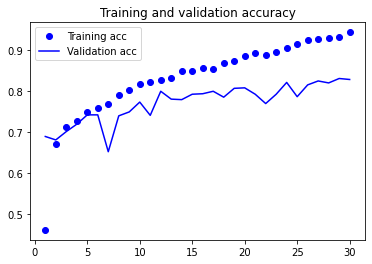

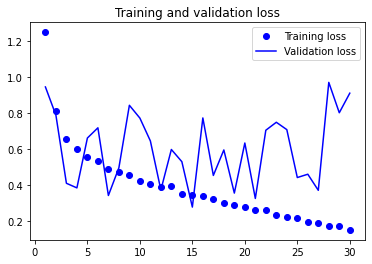

In [11]:
import os
from keras import layers
from keras import models
from keras import optimizers

# fill this part
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
# something is missing here 
model.add(layers.Flatten()) # convert to 1D
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax')) # replace k with the corresponding value

model.compile( # fill this part ...
              loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.00015),
              metrics=['acc']
              )
    
   
from keras.preprocessing.image import ImageDataGenerator

base_dir = './cat_dog_car_bike'
train_dir= os.path.join(base_dir, 'train')
validation_dir= os.path.join(base_dir, 'val')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=84,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=42)


import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



## Question 4 (Transfer Learning) <font color=Red>[25pts]</font>

Use the VGG16 as feature extractor with data augmentation (i.e. remove the top layer and freeze the VGGnet). You should try to achieve a **validation accuracy of at least 94\%**. Report the accuracy of your model on the test set.

*Write your codes below and some answers at the end of the notebook again. Plot both the training/validation accuracy and training/validation as a function of the epochs. Report the plots below:*

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Epoch 1/50
42/42 [==============================] - 19s 452ms/step - loss: 8.5465 - acc: 0.6818 - val_loss: 0.3865 - val_acc: 0.8084
Epoch 2/50
42/42 [==============================] - 18s 426ms/step - loss: 0.8961 - acc: 0.8394 - val_loss: 0.3853 - val_acc: 0.8731
Epoch 3/50
42/42 [==============================] - 17s 412ms/step - loss: 0.5103 - acc: 0.8501 - val_loss: 0.2276 - val_acc: 0.9198
Epoch 4/50
42/42 [==============================] - 17s 413ms/step - loss: 0.4437 - acc: 0.8555 - val_loss: 0.2792 - val_acc: 0.8802
Epoch 5/50
42/42 [==============================] - 18s 419ms/step - loss: 0.4055 - acc: 0.8722 - val_loss: 0.2913 - val_acc: 0.9281
Epoch 6/50
42/42 [==============================] - 17s 416ms/step - loss: 0.2718 - acc: 0.8967 - val_loss: 0.2850 - val_acc: 0.8347
Epoch 7/50
42/42 [==============================] - 18s 418ms/step - loss: 0.3

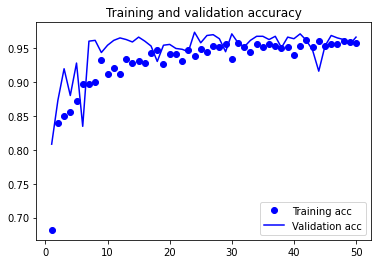

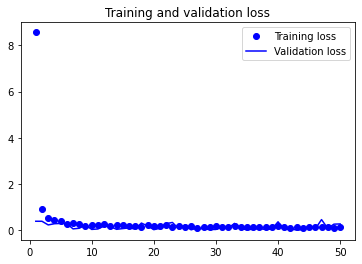

In [21]:
import os
from keras import layers
from keras import models
from keras import optimizers

# # fill this part
   
from keras.preprocessing.image import ImageDataGenerator

base_dir = './cat_dog_car_bike'
train_dir= os.path.join(base_dir, 'train')
validation_dir= os.path.join(base_dir, 'val')
test_dir= os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        class_mode='categorical',
        batch_size=40)


from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

conv_base.trainable = False

model.compile( # fill this part ...
              loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.005),
              metrics=['acc']
              )

history = model.fit_generator(
      train_generator,
      steps_per_epoch=42,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=21)

loss, accuracy = model.evaluate_generator(test_generator)
print("test accuracy:", accuracy, "test loss:", loss)


import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## Question 5 (Open Question) <font color=Red>[25pts]</font>

Use any of the techniques we saw during our course so as to improve the validation accuracy of your CNN. You should try to achieve a **validation accuracy of at least 96\%** and in any case better than the validation accuracy provided in question 4. Report the accuracy of your model on the test set.Your model should have **max size of 300Mb**.

*Write your codes below and some answers at the end of the notebook again. Plot both the training/validation accuracy and training/validation as a function of the epochs. Report the plots below:*

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Epoch 1/50
21/21 [==============================] - 18s 872ms/step - loss: 0.8391 - acc: 0.6836 - val_loss: 0.2679 - val_acc: 0.9006
Epoch 2/50
21/21 [==============================] - 17s 825ms/step - loss: 0.2818 - acc: 0.8896 - val_loss: 0.1502 - val_acc: 0.9425
Epoch 3/50
21/21 [==============================] - 18s 836ms/step - loss: 0.1862 - acc: 0.9248 - val_loss: 0.1581 - val_acc: 0.9389
Epoch 4/50
21/21 [==============================] - 18s 836ms/step - loss: 0.1730 - acc: 0.9248 - val_loss: 0.1715 - val_acc: 0.9605
Epoch 5/50
21/21 [==============================] - 17s 831ms/step - loss: 0.1167 - acc: 0.9534 - val_loss: 0.1258 - val_acc: 0.9677
Epoch 6/50
21/21 [==============================] - 17s 833ms/step - loss: 0.1016 - acc: 0.9666 - val_loss: 0.1959 - val_acc: 0.9569
Epoch 7/50
21/21 [==============================] - 17s 832ms/step - loss: 0.1

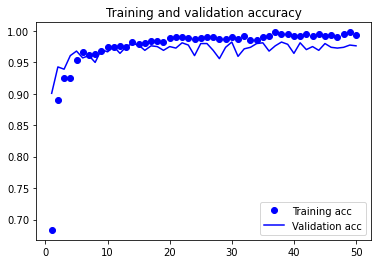

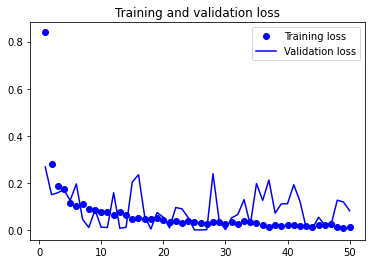

In [18]:
import os
from keras import layers
from keras import models
from keras import optimizers

# fill this part
from keras.preprocessing.image import ImageDataGenerator

base_dir = './cat_dog_car_bike'
train_dir= os.path.join(base_dir, 'train')
validation_dir= os.path.join(base_dir, 'val')
test_dir= os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=80,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=80,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        class_mode='categorical',
        batch_size=80)


from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

conv_base.trainable = False

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile( # fill this part ...
              loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.00002),
              metrics=['acc']
              )

history = model.fit_generator(
      train_generator,
      steps_per_epoch=21,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=11)

loss, accuracy = model.evaluate_generator(test_generator)
print("test accuracy", accuracy, "test loss", loss)


model.save('modelQ5.h1') #important do not change the name of the model

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Answers

Write your answers for these questions below in the box.

Question 1
* a) What is the right value of k? 
4
* b) How did you fix the error in the architecture?
add padding

Question 2
* a) There was a problem of underfitting or overfitting?
underfitting
* b) Which hyperparameter did you change?
activation function

Question 3
* a) which interval for the learning rate did you consider?
[0.0001, 0.001]
* b) which value for the learning rate did you consider?
0.00015

Question 4
* a) what is the validation accuracy of the modified VGG16 model?
0.9737
* b) what is the test accuracy of the modified VGG16 model?
0.97

Question 5
* a) what is the validation accuracy of your own model?
0.982
* b) what is the test accuracy of your own model?
0.975
* c) provide your model with a cloud link (eg: Google Drive, One Drive or Baiduyun Drive)
https://connecthkuhk-my.sharepoint.com/:u:/g/personal/jc061005_connect_hku_hk/EVPZZ1cQNN1Gp2UXNMpiFIMBV4atp_1eA50NZYpCShCgWQ


